<a href="https://colab.research.google.com/github/Nivyasunil/projects/blob/main/twitter_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step-1: Import Necessary Dependencies**

In [109]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

Step-2: Read and Load the Dataset

In [110]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

In [111]:
import pandas as pd
DATASET_ENCODING = "ISO-8859-1"
df=pd.read_csv('/content/drive/MyDrive/project twitter csv/twitter_new.csv',encoding =DATASET_ENCODING)
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [112]:
df = pd.read_csv('/content/drive/MyDrive/project twitter csv/twitter_new.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1362251,4,2049284689,Fri Jun 05 16:36:52 PDT 2009,NO_QUERY,Maria_Gregersen,On my way to bed... Nighty night...
1065591,4,1964969547,Fri May 29 15:06:37 PDT 2009,NO_QUERY,BethCab,ruined the jonas brothers for everyone today
334006,0,2013469778,Tue Jun 02 22:45:11 PDT 2009,NO_QUERY,Goltra,LITTLE JOY. Playing live on State Street in Sa...
972651,4,1832635997,Sun May 17 21:10:01 PDT 2009,NO_QUERY,sirflynt,"Just got back from a wonderful trip to MS, but..."
1494840,4,2069806589,Sun Jun 07 16:33:44 PDT 2009,NO_QUERY,CharlesThe32nd,Eating supper


Step-3: Exploratory Data Analysis 



 3.1: Five top records of data

3.2: Columns/features in data

In [113]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

3.3: Length of the **dataset**

In [114]:
print('length of data is', len(df))

length of data is 1600000


3.4: Shape of data


In [115]:
df. shape

(1600000, 6)

3.5: Data **information**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


3.6: Datatypes of all **columns**

In [117]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

3.7: Checking for Null **values**

In [118]:
np.sum(df.isnull().any(axis=1))

0

3.8: Rows and columns in the **dataset**

In [119]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


3.9: Check unique Target **Values**

In [120]:
df['target'].unique()

array([0, 4])

3.10: Check the number of target **values**

In [121]:
df['target'].nunique()

2

# Step-4: Data Visualization of Target **Variables**

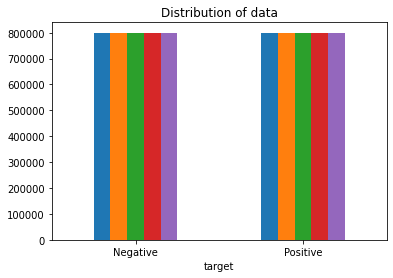

In [122]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

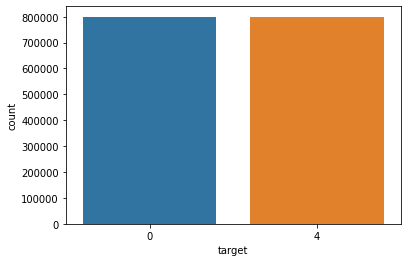

In [123]:
import seaborn as sns
sns.countplot(x='target', data=df)

# Step-5: Data Preprocessing 
In the above-given problem statement before training the model, we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.

5.1: Selecting the text and Target column for our further **analysis**

In [124]:
data=df[['text','target']]

5.2: Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)



In [125]:
data['target'] = data['target'].replace(4,1)

<ipython-input-125-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


5.3: Print unique values of target variables

In [126]:
data['target'].unique()

array([0, 1])

5.4: Separating positive and negative tweets

In [127]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

5.5: taking one fourth data so we can run on our machine easily

In [128]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

5.6: Combining positive and negative tweets

In [129]:
dataset = pd.concat([data_pos, data_neg])


5.7: Making statement text in lower case

In [130]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

5.8: Defining set containing all stopwords in English.

In [131]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

5.9: Cleaning and removing the above stop words list from the tweet text

In [132]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

5.10: Cleaning and removing punctuations

In [133]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.11: Cleaning and removing repeating characters

In [134]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.12: Cleaning and removing URL’s

In [135]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.13: Cleaning and removing Numeric numbers

In [136]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.14: Getting tokenization of tweet text

In [137]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

5.15: Applying Stemming

In [138]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

5.16: Applying Lemmatizer

In [139]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [140]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [141]:
# nltk
import nltk
import re
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: preprocess(x))

5.17: Separating input feature and label

In [142]:
X=data.text
y=data.target

5.18: Plot a cloud of words for negative tweets

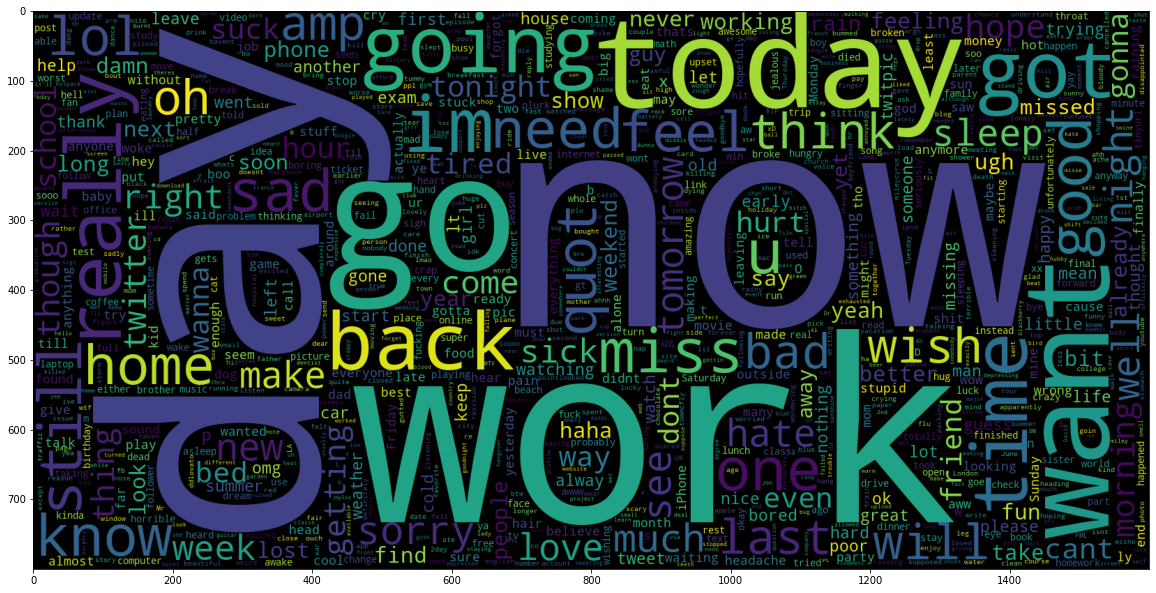

In [143]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

5.19: Plot a cloud of words for positive tweets

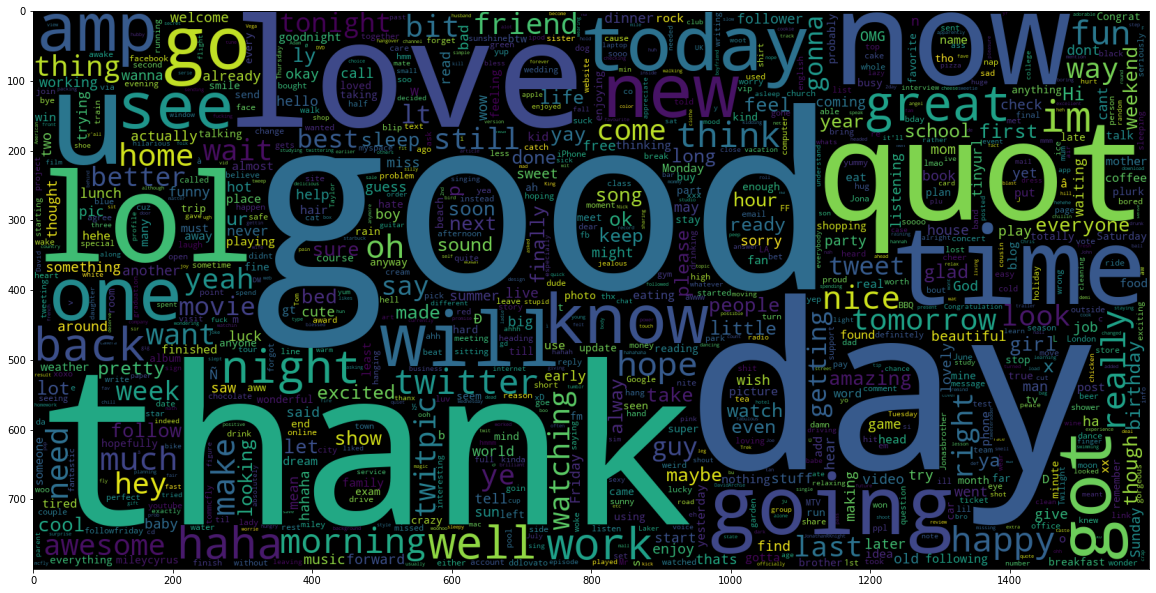

In [144]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# **Step-6: Splitting our data into Train and Test Subset**

In [145]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

# **Step-7: Transforming Dataset using TF-IDF Vectorizer**

 Fit the TF-IDF Vectorizer

In [146]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000



 Transform the data using TF-IDF Vectorizer

In [147]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# **Step-8: Function For Model Evaluation**
After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :


*  Accuracy Score 
*  Confusion Matrix with Plot 
* ROC-AUC Curve






















In [148]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = TfidfVectorizer(stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'])
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['target'], test_size=0.25, random_state=5)
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.7722875


In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, Y_test)

array([[155877,  47066],
       [ 44019, 153038]])

# **Step-9: Model Building**
In the problem statement we have used three different models respectively :











8.2: Plot the ROC-AUC Curve for model-1

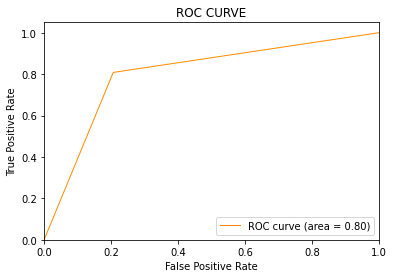

In [152]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

 Plot the ROC-AUC Curve for model-2

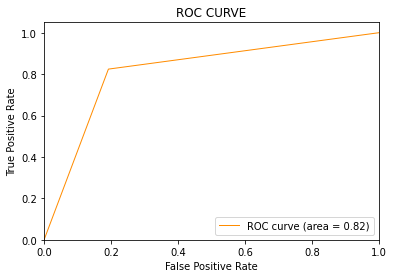

In [154]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

 Plot the ROC-AUC Curve for model-3

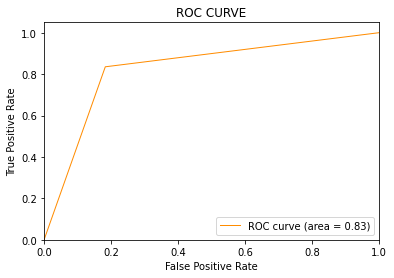

In [156]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **PROJECT-2 INSTAGRAM INFLUENCERS**





TOP INSTAGRAM INFLUENCERS DATA
Instagram is an American photo and video sharing social networking service founded in 2010 by Kevin Systrom and Mike Krieger, and later acquired by Facebook Inc.. The app allows users to upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow other users to add their content to a personal feed. Instagram was originally distinguished by allowing content to be framed only in a square (1:1) aspect ratio of 640 pixels to match the display width of the iPhone at the time. In 2015, this restrictions was eased with an increase to 1080 pixels. It also added messaging features, the ability to include multiple images or videos in a single post, and a Stories feature—similar to its main competitor Snapchat—which allowed users to post their content to a sequential feed, with each post accessible to others for 24 hours. As of January 2019, Stories is used by 500 million people daily. Originally launched for iOS in October 2010, Instagram rapidly gained popularity, with one million registered users in two months, 10 million in a year, and 1 billion by June 2018. In April 2012, Facebook Inc. acquired the service for approximately US$1 billion in cash and stock. The Android version was released in April 2012, followed by a feature-limited desktop interface in November 2012, a Fire OS app in June 2014, and an app for Windows 10 in October 2016. As of October 2015, over 40 billion photos had been uploaded. Although often admired for its success and influence, Instagram has also been criticized for negatively affecting teens' mental health, its policy and interface changes, its alleged censorship, and illegal and inappropriate content uploaded by users.

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
df=pd.read_csv('/content/Influencer .csv')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [186]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [187]:
df.tail()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil
199,200,\nnancyajram,81,33.4m,382.5k,3.8k,0.004,128.2k,1.5b,France


In [188]:
df.copy()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [189]:
df.sample(2)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
37,38,\npriyankachopra,85,82.7m,1.6m,3.6k,0.008,644.6k,5.6b,United States
59,60,\njustintimberlake,87,66.5m,602.0k,785,0.013,842.9k,472.6m,United States


In [190]:
df.shape

(200, 10)

In [191]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [193]:
df.describe()

,Rank,Influence Score,60-Day Eng Rate
count,200.000000,200.000000,200.000000
mean,100.500000,81.850000,0.019160
std,57.879185,8.875323,0.032577
min,1.000000,22.000000,0.000000
25%,50.750000,80.000000,0.004000
50%,100.500000,84.000000,0.009500
75%,150.250000,86.000000,0.017250
max,200.000000,93.000000,0.250000


In [194]:
df.mean()

<ipython-input-194-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Rank               100.50000
Influence Score     81.85000
60-Day Eng Rate      0.01916
dtype: float64

In [195]:
df.mode()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\n5-Minute Crafts GIRLY,85.0,33.6m,1.1m,10.0k,0.001,1.7m,1.5b,United States
1,2,\nShakira,NaN,33.8m,NaN,NaN,0.004,NaN,NaN,NaN
2,3,\naddisonraee,NaN,36.0m,NaN,NaN,NaN,NaN,NaN,NaN
3,4,\nadele,NaN,52.9m,NaN,NaN,NaN,NaN,NaN,NaN
4,5,\nadidasoriginals,NaN,55.1m,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,196,\nzendaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,197,\nzidane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,198,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,199,anushkasen0408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
df.median()

<ipython-input-196-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Rank               100.5000
Influence Score     84.0000
60-Day Eng Rate      0.0095
dtype: float64

In [197]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [198]:
df.nunique()

Rank                   200
Channel Info           200
Influence Score         32
Followers              172
Avg. Likes             134
Posts                  121
60-Day Eng Rate         53
New Post Avg. Likes    170
Total Likes            116
Country Or Region       25
dtype: int64

In [199]:
df.dtypes.value_counts()

object     7
int64      2
float64    1
dtype: int64

In [200]:
df.value_counts()

Rank  Channel Info       Influence Score  Followers  Avg. Likes  Posts  60-Day Eng Rate  New Post Avg. Likes  Total Likes  Country Or Region
1     \ncristiano        92               485.2m     8.7m        3.4k   0.013            6.3m                 29.1b        Spain                1
133   \nhrithikroshan    85               44.2m      1.6m        617    0.018            780.5k               958.9m       Côte d'Ivoire        1
123   \nthenotoriousmma  82               46.2m      1.1m        3.2k   0.006            287.4k               3.5b         United States        1
124   \ndaddyyankee      80               46.1m      650.0k      35     0.008            346.9k               22.8m        Puerto Rico          1
125   \nnatgeotravel     82               45.8m      189.9k      16.9k  0.001            52.8k                3.2b         United States        1
                                                                                                                                 

In [201]:
df.duplicated().value_counts()

False    200
dtype: int64

In [202]:
df.isna().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [203]:
for i in df.columns:
    df[i].replace({'..':np.nan},inplace=True) 
    df

In [204]:
def mea(df,col):#to replace null values with median
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    median=df[col].median()
    df[col]=np.where(df[col]>upper,median,np.where(df[col]<lower,median,df[col]))
    sns.boxplot(df[col],data=df)

In [205]:
pd.set_option('display.max_rows', 100)
df.head(100)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
6,7,\nkimkardashian,91,330.7m,3.5m,5.7k,0.005,1.7m,19.8b,United States
7,8,\nbeyonce,92,276.1m,3.6m,2.0k,0.008,2.2m,7.3b,United States
8,9,\nkhloekardashian,89,273.9m,2.4m,4.1k,0.002,404.7k,9.8b,United States
9,10,\njustinbieber,91,260.0m,1.9m,7.4k,0.007,1.7m,14.0b,Canada


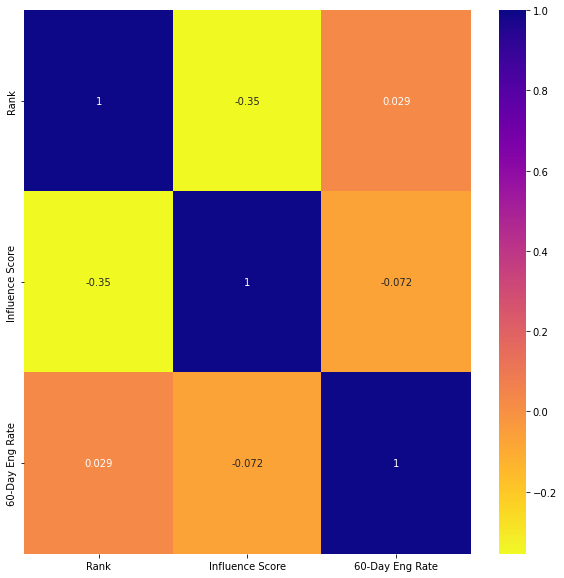

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="plasma_r", annot=True)

In [207]:
import plotly.express as px
import math

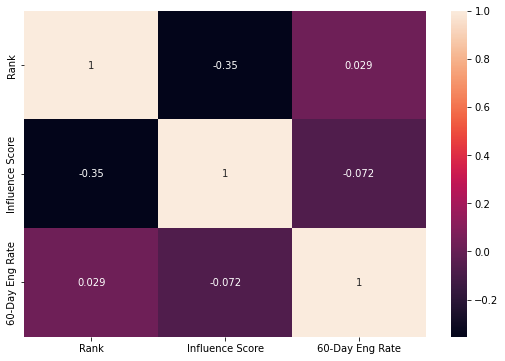

In [208]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)

In [210]:
data1a=df[['Channel Info','Followers']]
data1a=data1a.sort_values('Followers',ascending=False)
display(data1a[0:5])
fig = px.bar(data1a[:30], x='Channel Info', y='Followers',title="Followers Ranknig by Channel Info")
fig.show()

,Channel Info,Followers
33,\ngal_gadot,88.0m
34,\ndualipa,87.3m
35,\nvindiesel,83.2m
36,\nnasa,83.1m
37,\npriyankachopra,82.7m


In [214]:
data1b=df[['Country Or Region','Influence Score']]
data1b=data1b.groupby('Country Or Region',as_index=False)['Influence Score'].max()
data1b=data1b.sort_values('Influence Score',ascending=False)
display(data1b[0:5])
fig = px.bar(data1b[:30], x='Country Or Region', y='Influence Score',title="Max Influence score by Country or Region")
fig.show()

,Country Or Region,Influence Score
23,United States,93
17,Spain,92
4,Canada,91
2,Brazil,90
12,Italy,86


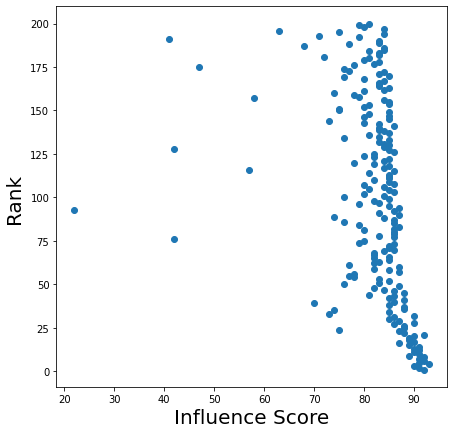

In [218]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Influence Score',fontsize=20)
ax.set_ylabel('Rank ',fontsize=20)
ax.scatter(df['Influence Score'],df['Rank'])
plt.show()

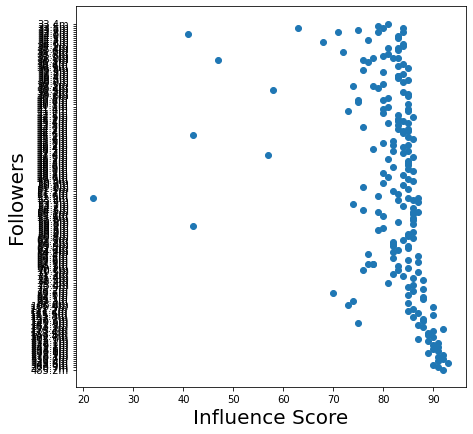

In [222]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Influence Score',fontsize=20)
ax.set_ylabel('Followers',fontsize=20)
ax.scatter(df['Influence Score'],df['Followers'])
plt.show()

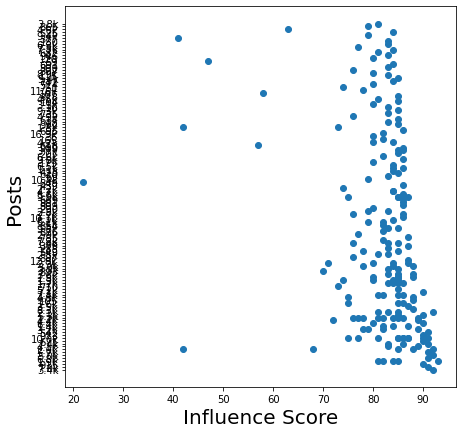

In [225]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Influence Score',fontsize=20)
ax.set_ylabel('Posts ',fontsize=20)
ax.scatter(df['Influence Score'],df['Posts'])
plt.show()

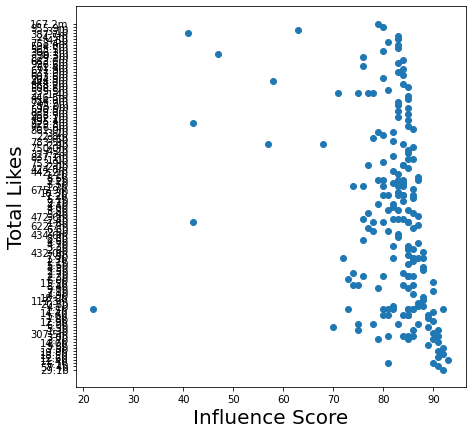

In [227]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Influence Score',fontsize=20)
ax.set_ylabel('Total Likes',fontsize=20)
ax.scatter(df['Influence Score'],df['Total Likes'])
plt.show()

In [228]:
names=df['Channel Info'].tolist()
for i in range(10):
    print('https://www.instagram.com/'+names[i])

https://www.instagram.com/
cristiano
https://www.instagram.com/kyliejenner
https://www.instagram.com/
leomessi
https://www.instagram.com/
selenagomez
https://www.instagram.com/
therock
https://www.instagram.com/
arianagrande
https://www.instagram.com/
kimkardashian
https://www.instagram.com/
beyonce
https://www.instagram.com/
khloekardashian
https://www.instagram.com/
justinbieber


In [229]:
df['Channel Info'].duplicated().any()

False

In [231]:
df['Posts']=df['Posts'].apply(lambda x: int(x) if "k" not in x else int(float(x.replace('k',""))*1000) )

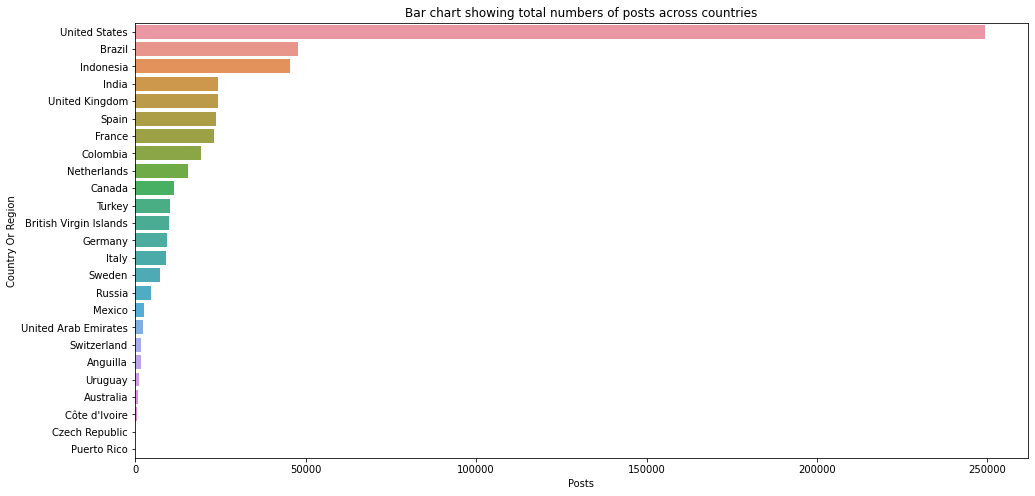

In [233]:
posts_count_on_country=df.groupby(['Country Or Region'],as_index=False)['Posts'].sum()
posts_count_on_country.reset_index(drop=True,inplace=True)
posts_count_on_country.sort_values(['Posts'],inplace=True,ascending=False)
plt.figure(figsize=(16, 8))
plt.title("Bar chart showing total numbers of posts across countries")
ax=sns.barplot(y='Country Or Region', x='Posts', data=posts_count_on_country);
plt.show()

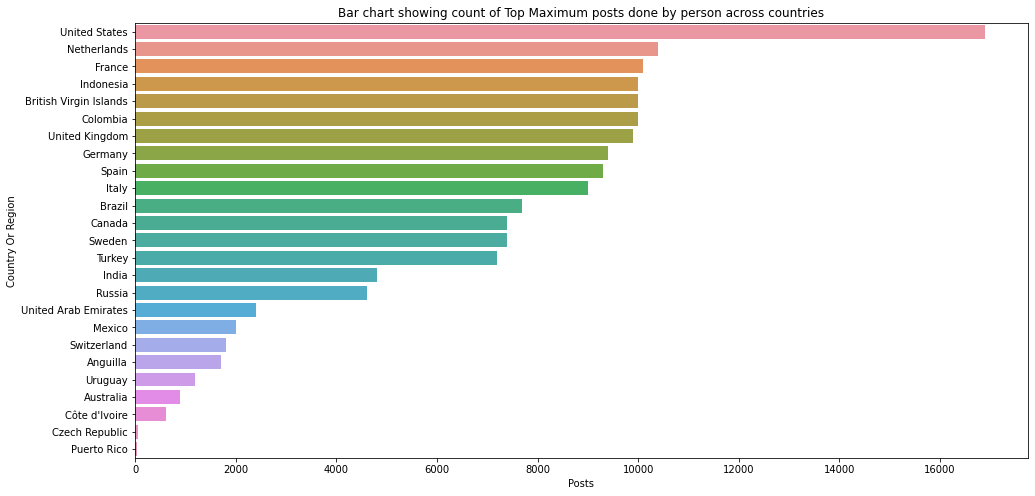

In [235]:
posts_count_on_country=df.groupby(['Country Or Region'],as_index=False)['Posts'].max()
posts_count_on_country.reset_index(drop=True,inplace=True)
posts_count_on_country.sort_values(['Posts'],inplace=True,ascending=False)
plt.figure(figsize=(16, 8))
plt.title("Bar chart showing count of Top Maximum posts done by person across countries")
ax=sns.barplot(y='Country Or Region', x='Posts', data=posts_count_on_country);
plt.show()



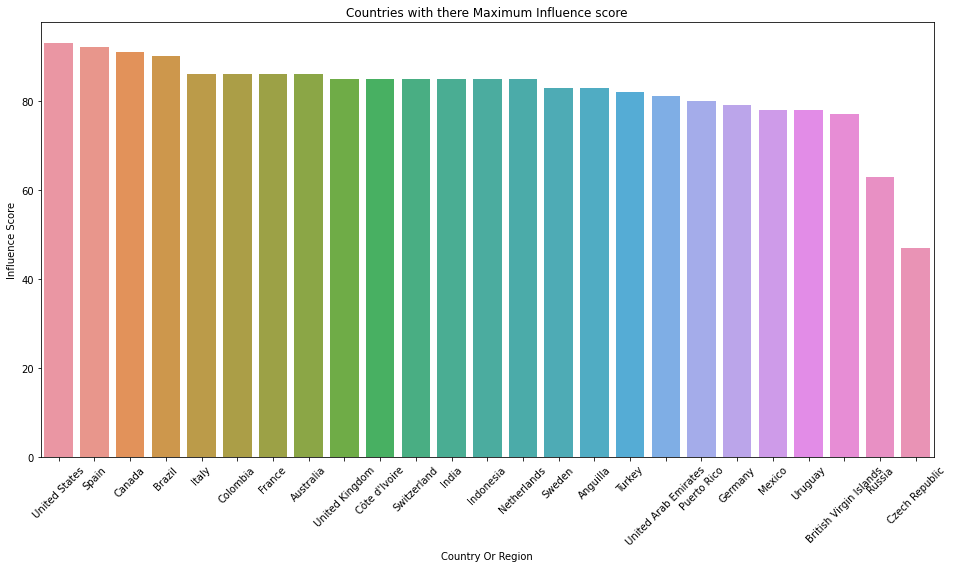

In [241]:
most_influence_country=df.groupby(['Country Or Region'],as_index=False)['Influence Score'].max()
most_influence_country.reset_index(drop=True,inplace=True)
most_influence_country.sort_values(by=['Influence Score'],inplace=True,ascending=False)
plt.figure(figsize=(16, 8))
plt.title("Countries with there Maximum Influence score")
ax=sns.barplot(
    data=most_influence_country, x="Country Or Region", y="Influence Score")
plt.xticks(rotation='45')
plt.show()

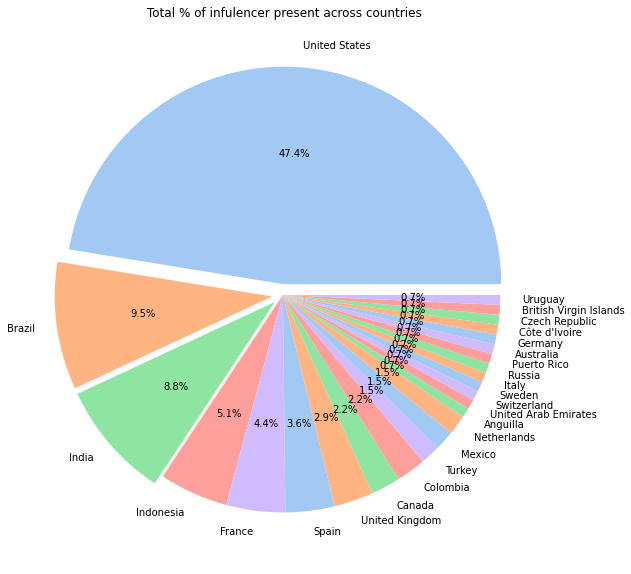

In [244]:
df["Entries"]=1
No_of_infulencer_per_country=df.groupby(["Country Or Region"],as_index=False)['Entries'].sum()
No_of_infulencer_per_country.sort_values(by=['Entries'],ascending=False,inplace=True)
plt.figure(figsize=(15, 10))
plt.title(" Total % of infulencer present across countries")
explode = No_of_infulencer_per_country['Entries'].apply(lambda x:0.05 if x>10 else 0)
colors = sns.color_palette('pastel')[0:5]
plt.pie(No_of_infulencer_per_country['Entries'].tolist(), labels = No_of_infulencer_per_country["Country Or Region"].tolist()
        , colors = colors, autopct='%1.1f%%',explode = explode)
plt.show()

---------------------  Posts Vs Likes plot for Top 2 Infulencing Countries  ---------------------


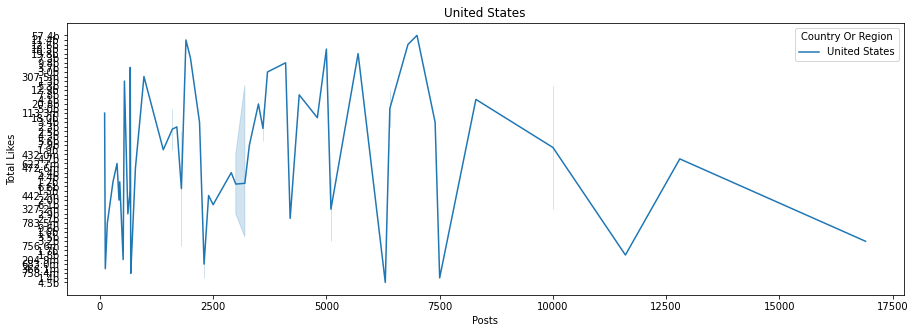

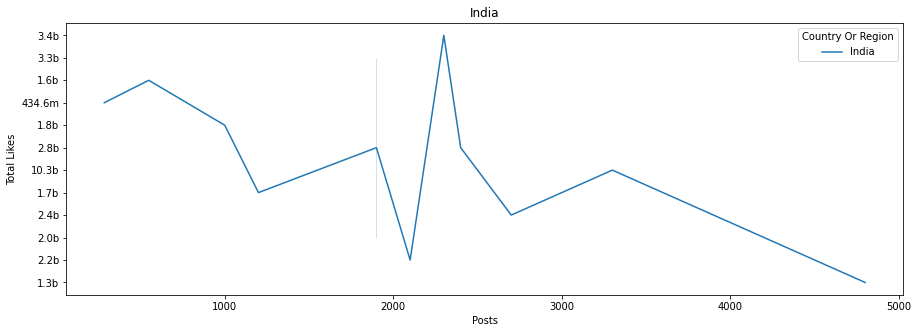

---------------------------------------------------
If you post more doesn't mean you'll get more likes
---------------------------------------------------


In [247]:
print("---------------------  Posts Vs Likes plot for Top 2 Infulencing Countries  ---------------------")
plt.figure(figsize=(15, 5))
plt.title("United States")
USA_data=df[df['Country Or Region'].isin(["United States"])]
sns.lineplot(data=USA_data, x="Posts", y="Total Likes",hue='Country Or Region')
plt.show()
#-------------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.title("India")
India_data=df[df['Country Or Region'].isin(["India"])]
sns.lineplot(data=India_data, x="Posts", y="Total Likes",hue='Country Or Region')
plt.show()
print("---------------------------------------------------")
print("If you post more doesn't mean you'll get more likes")
print("---------------------------------------------------")

Followers Vs Likes plot for Top 2 Infulencing Countries


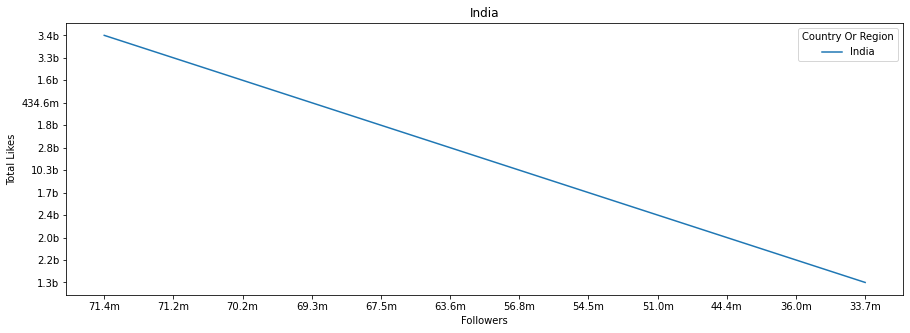

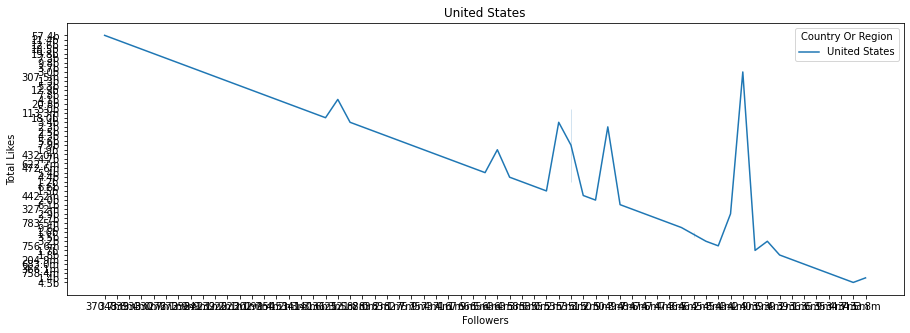

------------------------------------------------------------------------------------------
If you have more followers there is good probability that you can get good amount of Likes
------------------------------------------------------------------------------------------


In [248]:
print("Followers Vs Likes plot for Top 2 Infulencing Countries")
plt.figure(figsize=(15, 5))
plt.title("India")
India_data=df[df['Country Or Region'].isin(["India"])]
sns.lineplot(data=India_data, x="Followers", y="Total Likes",hue='Country Or Region')
plt.show()
plt.figure(figsize=(15, 5))
plt.title("United States")
USA_data=df[df['Country Or Region'].isin(["United States"])]
sns.lineplot(data=USA_data, x="Followers", y="Total Likes",hue='Country Or Region')
plt.show()

print("------------------------------------------------------------------------------------------")
print("If you have more followers there is good probability that you can get good amount of Likes")
print("------------------------------------------------------------------------------------------")

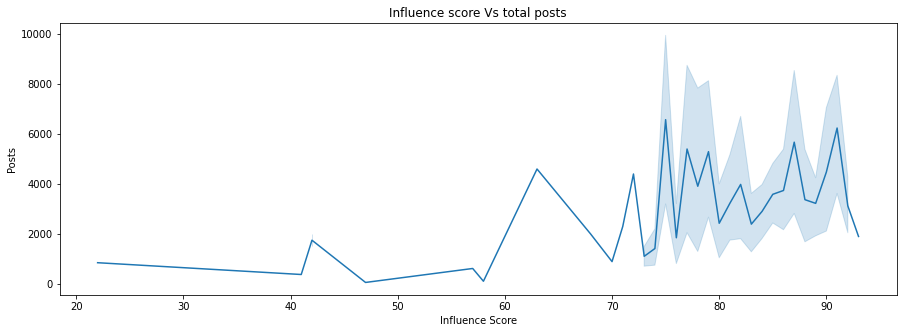

---------------------------------------------------------------------------------------------------------------------
People with highest Influence score have decent numbers of post but that doesn't mean they are at top because of 
there number of posts
---------------------------------------------------------------------------------------------------------------------


In [258]:
plt.figure(figsize=(15, 5))
plt.title("Influence score Vs total posts")
sns.lineplot(data=df, x="Influence Score", y="Posts")
plt.show()

print("---------------------------------------------------------------------------------------------------------------------")
print("People with highest Influence score have decent numbers of post but that doesn't mean they are at top because of \nthere number of posts")
print("---------------------------------------------------------------------------------------------------------------------")

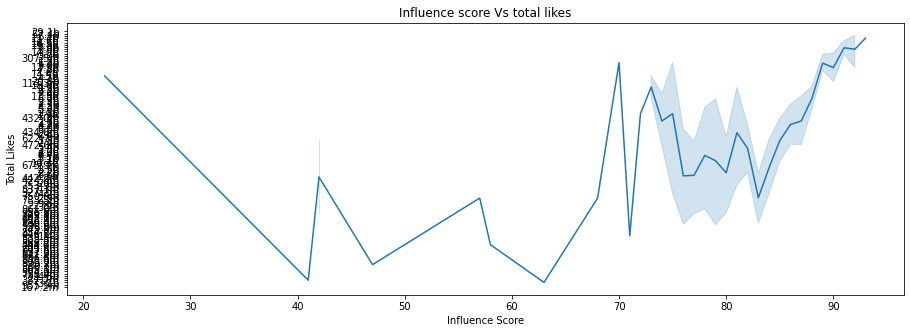

---------------------------------------------------------------------------------------------------------------------
People with highest Influence score have decent numbers of likes but that doesn't mean they are at top because of 
there number of likes
---------------------------------------------------------------------------------------------------------------------


In [260]:
plt.figure(figsize=(15, 5))
plt.title("Influence score Vs total likes")
sns.lineplot(data=df, x="Influence Score", y="Total Likes")
plt.show()

print("---------------------------------------------------------------------------------------------------------------------")
print("People with highest Influence score have decent numbers of likes but that doesn't mean they are at top because of \nthere number of likes")
print("---------------------------------------------------------------------------------------------------------------------")

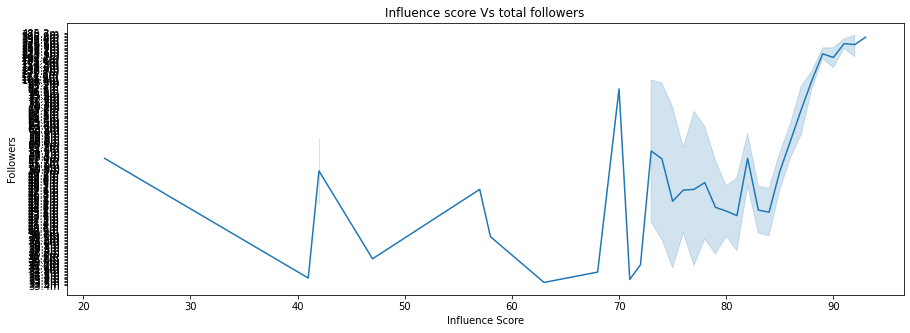

-------------------------------------------------------------------------------------------
People with highest Influence score have high numbers of followers and the graphs proves it
-------------------------------------------------------------------------------------------


In [262]:
plt.figure(figsize=(15, 5))
plt.title("Influence score Vs total followers")
sns.lineplot(data=df, x="Influence Score", y="Followers")
plt.show()

print("-------------------------------------------------------------------------------------------")
print("People with highest Influence score have high numbers of followers and the graphs proves it")
print("-------------------------------------------------------------------------------------------")

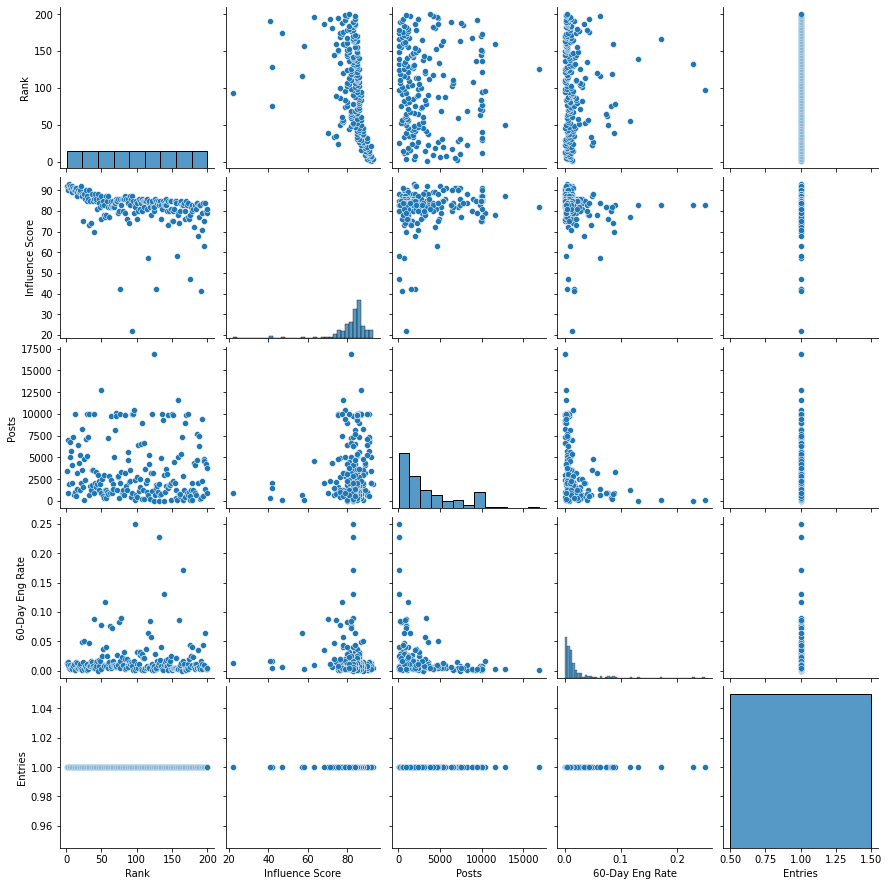

In [263]:
sns.pairplot(data=df)

In [264]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

<ipython-input-264-3c5b321952ea>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



60-Day Eng Rate    4.306121
Posts              1.233979
Rank               0.000000
Entries            0.000000
Influence Score   -3.478544
dtype: float64

In [265]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

<ipython-input-265-1fbc2d986607>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



60-Day Eng Rate    23.044336
Influence Score    16.364176
Posts               0.834245
Entries             0.000000
Rank               -1.200000
dtype: float64